In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
from IPython.display import Audio
from numpy.fft import fft, ifft

# helps us to plot the graphs inline
%matplotlib inline

In [2]:
# reading the audio file 
Fs, data = read('./hello_ahbar.wav')

# we need only one channel therefore channel 0 is selected
data = data[:,0] 

print("Sampling Frequency is: ", Fs)
print("min:", min(data), "max:", max(data))
# print(data[10000:10100])

Sampling Frequency is:  16000
min: -8573 max: 5654


In [4]:
Audio(data, rate=Fs)    # this is the original audio 

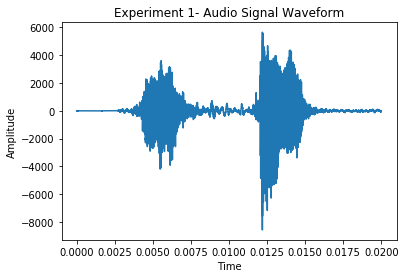

In [5]:
plt.figure()
time = np.linspace(0., 0.02, data.shape[0])
plt.plot(time, data)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Experiment 1- Audio Signal Waveform')
plt.show()

In [6]:
from scipy import signal
x = data 
fs = Fs

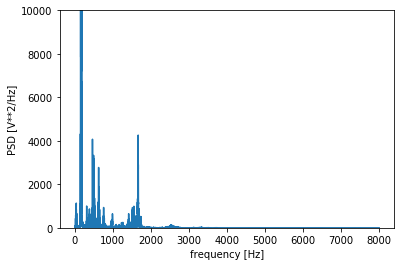

In [7]:
# plotting the PSD of the signal 
f, Pxx_den = signal.periodogram(x, fs)
plt.plot(f, Pxx_den)
plt.ylim([0, 1e4])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [8]:

#Quantization with 16 levels uniform and enocding 

minimmum = min(data) 
maximmum = max(data)

interval_length = (maximmum - minimmum) / 16

print("length of each interval:", interval_length)

intervals = []

# create intervals 
for i in range(0, 32):
    intervals.append(( minimmum + i*interval_length/2, minimmum + (i+1)*interval_length/2))

# print(intervals)

quants = [] # holds the quantized values 
bit_code = [] # holds the bit codes 

for d in data:    
    for i in range(0, 32):
        li = intervals[i][0]
        ri = intervals[i][1]

        if d >= li and d <= ri:
            quants.append(int((li + ri)/2))
            bit_code.append('{0:08b}'.format(int((li + ri)/2)))
            break

            
print("min quant level: ", min(quants), "max quant level: ", max(quants))
# print("quantized data: ", quants[1000:10000])
# print("encoded data: ", bit_code[9000:9900])

length of each interval: 889.1875
min quant level:  -8350 max quant level:  5431


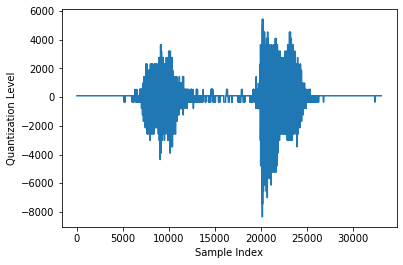

In [9]:
# plot the quantized values 
plt.plot(quants)
plt.xlabel('Sample Index')
plt.ylabel('Quantization Level')
plt.show()

In [10]:
Audio(quants, rate=Fs)  #listen to the audio generated after quantization